<a href="https://colab.research.google.com/github/bgittel/Beyond_Genre/blob/main/code/Modernity_Critique_Corpus_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Step 1: Mount Drive and Load Data
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

# Load CSV file
file_path = '/content/drive/My Drive/Kulturkritik/Metadata/MoL_metadata_20_06_2024_manually_corrected_engl_withoutELTEC_FS.csv'
df = pd.read_csv(file_path, sep=";")

# Step 2: Filter Data After 1750
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df_filtered = df[df['year'] > 1750]
print(len(df))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
335


In [30]:
desired_categories = ["cultural_critique_cat",	"society_critique_cat",	"civilisation_critique_cat",	"decadence_literature_cat",	"social_critique_cat",
"critique_of_the_present_cat",	"modernity_critique_cat", "regional_heritage_art_cat", "conservative_revolution_literature_cat",
                      "worldview_literature_cat", "progress_critique_cat"]

<ipython-input-31-7a3d3f3ba108>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[support_cols] = df[support_cols].replace({"FALSCH": False, "WAHR": True})
<ipython-input-31-7a3d3f3ba108>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Texts', data=support_counts_df, palette="deep")


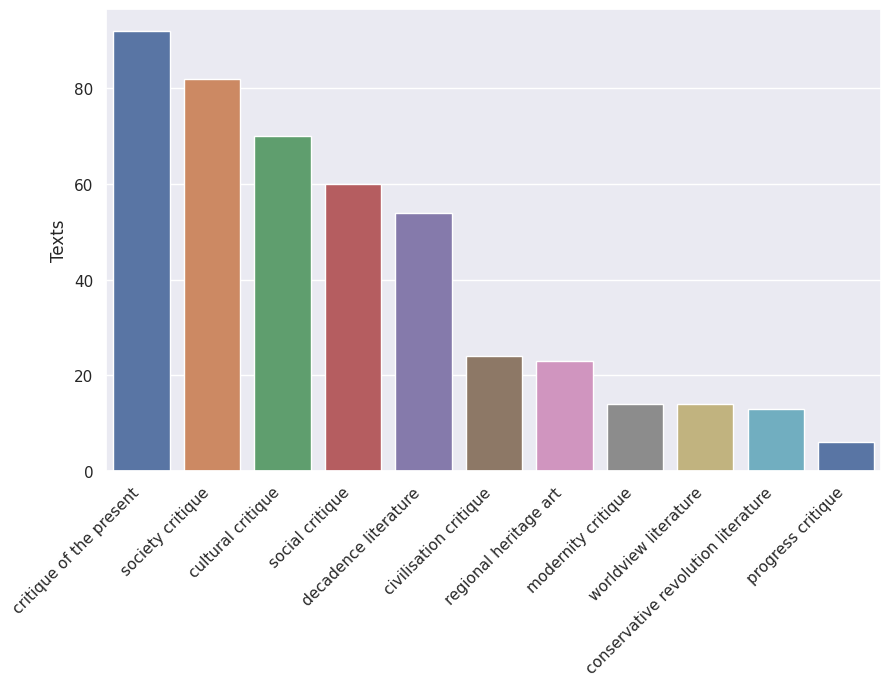

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Convert "Falsch" to False and "Wahr" to True in each relevant column
df[support_cols] = df[support_cols].replace({"FALSCH": False, "WAHR": True})

# Step 1: Convert Boolean values to integers (True to 1, False to 0)
df[support_cols] = df[support_cols].astype(int)

# Step 2: Calculate support counts for each category column
support_counts = df[support_cols].sum()

# Step 3: Sort categories by the number of texts in descending order
sorted_support_counts = support_counts.sort_values(ascending=False)

# Step 4: Rename specific categories for readability
sorted_support_counts.rename(index={
    'critique_of_the_present_cat': 'critique of the present',
    'society_critique_cat': 'society critique',
    'social_critique_cat': 'social critique',
    'cultural_critique_cat': 'cultural critique',
    'modernity_critique_cat': 'modernity critique',
    'civilisation_critique_cat': 'civilisation critique',
    'progress_critique_cat': 'progress critique',
    'decadence_literature_cat': 'decadence literature',
    'regional_heritage_art_cat': 'regional heritage art',
    'worldview_literature_cat': 'worldview literature',
    'conservative_revolution_literature_cat': 'conservative revolution literature'
}, inplace=True)

# Step 5: Convert Series to DataFrame for plotting
support_counts_df = sorted_support_counts.reset_index()
support_counts_df.columns = ['Category', 'Texts']

# Step 6: Plotting
# Set Seaborn style
sns.set(style="darkgrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Texts', data=support_counts_df, palette="deep")

# Customize the plot
ax.set_title("")  # Remove the heading
ax.set_ylabel("Texts")
ax.set_xlabel(None)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Save the figure if desired
plt.savefig('figure1.jpg', dpi=1000, bbox_inches='tight')

# Display the plot
plt.show()


In [32]:
support_counts_df

,Category,Texts
0,critique of the present,92
1,society critique,82
2,cultural critique,70
3,social critique,60
4,decadence literature,54
5,civilisation critique,24
6,regional heritage art,23
7,modernity critique,14
8,worldview literature,14
9,conservative revolution literature,13
